In [1]:
%run geometria.ipynb

In [2]:
Tolerance = 10e-12

# Funkcje pomocnicze

In [3]:
def det(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + a[1] * c[0] - c[0] * b[1] - b[0] * a[1] - a[0] * c[1]


def orient(a, b, c):
    determinant = det(a, b, c)
    if determinant > Tolerance: # lewa strona
        return 1
    elif determinant < -Tolerance: # prawa strona
        return -1
    else: # współliniowe
        return 0
    
def get_lines(CH):
    lines = [] 
    for i in range(len(CH)):
        lines.append([CH[i], CH[(i+1)%len(CH)]])
    return lines


# Główny algorytm

In [4]:
def przyrostowy(points):
    scenes=[]
    scenes.append(Scene([PointsCollection(points, color = 'hotpink')]))
    
    # Punkty zostają posortowane. W ten sposób rozwiązany zostaje problem sprawdzania czy punkt nie należy do wnętrza otoczki.
    sorted_points = sorted(points, key = lambda p: (p[0],p[1]))
    
    # Z postortowanego zbioru usuwane są punkty o takiej samej współrzędnej x, z pominięciem tych punktów, 
    # które dla tego samego x mają najmneijszą i największą wartość y.
    new_points = []
    new_points.append(sorted_points[0])
    last_x = sorted_points[0][0]
    i = 1
    while i < len(sorted_points):
        if sorted_points[i][0] != last_x:
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        else:
            while i < len(sorted_points) and sorted_points[i][0] == last_x:
                i+=1
            i-=1
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        i+=1
    
    # Dwa pierwsze punkty z new_points dodawane są do otoczki
    CH = []
    CH.append(new_points[0])
    CH.append(new_points[1])
    
    lines = get_lines(CH)
    scenes.append(Scene([PointsCollection(points, color = 'hotpink')],
                       [LinesCollection(deepcopy(lines), color = 'lime')]))
    
    for i in range(2, len(new_points)):
        n = len(CH)
        point = new_points[i]
                
        upper_index = n-1
        lower_index = n-1
        # Szukany jest punkt, przez który przechodzi górna styczna poprowadzona z aktualnie sprawdzanego punktu
        while orient(point, CH[upper_index], CH[(upper_index+1) % n]) <= 0:
            upper_index = (upper_index+1)%n
            
        # Szukany jest punkt, przez który przechodzi dolna styczna poprowadzona z aktualnie sprawdzanego punktu 
        while orient(point, CH[lower_index], CH[(lower_index+n-1) % n]) >= 0:
            lower_index = (lower_index+n-1)%n
        
        scenes.append(Scene([PointsCollection(points, color = 'hotpink'),
                            PointsCollection(CH, color = 'green')],
                           [LinesCollection(deepcopy(lines), color = 'lime'),
                           LinesCollection([[point, CH[upper_index]], [point, CH[lower_index]]], color ='fuchsia')]))
        
        # Aktualizujemy otoczkę poprzez dodanie aktualnie rozpatrywanego punktu i tylko tych punktów otoczki, 
        # które nie znajdują się wewnątrz. Punkty otoczki są przechowywane w kolejności przeciwnej do ruchu wskazówek zegara.
        
        tmp_CH = []
        curr = upper_index
        tmp_CH.append(CH[upper_index])
        while curr != lower_index:
            curr = (curr + 1) % n
            tmp_CH.append(CH[curr])
        tmp_CH.append(point)
        
        CH = deepcopy(tmp_CH)
        lines = get_lines(CH)
        scenes.append(Scene([PointsCollection(points, color = 'hotpink'),
                            PointsCollection(CH, color = 'green')],
                           [LinesCollection(deepcopy(lines), color = 'lime')]))
        
    return CH, scenes

# Testowanie

Liczba punktów otoczki:  12
Punkty otoczki:  [(99.46148507913911, 83.10296689787377), (85.2111329771426, 91.36511737898361), (59.89969425159192, 99.22619213606404), (12.00566927416402, 97.65834002999217), (0.38204234104382007, 93.95346670356969), (0.192023820740872, 43.15277895668353), (10.028914385432886, 7.701052156098154), (33.726958318502284, 4.319716258337891), (43.55966464670208, 3.272753397466599), (68.64388013488383, 3.133766941242311), (85.65717350928618, 5.6463789494606065), (99.66466788484414, 13.258253315151213)]


<IPython.core.display.Javascript object>


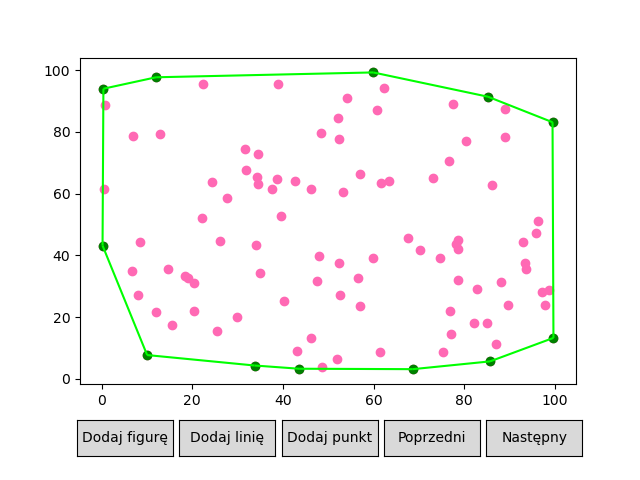

In [9]:
def generate_points(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))


data = generate_points(100, 0, 100)
CH, scenes = przyrostowy(data)
print("Liczba punktów otoczki: ", len(CH))
print("Punkty otoczki: ", CH)
plot = Plot(scenes=scenes)
plot.draw()

# Algorytm bez wizualizacji

In [11]:
def przyrostowy_(points):
    # Punkty zostają posortowane. W ten sposób rozwiązany zostaje problem sprawdzania czy punkt nie należy do wnętrza otoczki.
    sorted_points = sorted(points, key = lambda p: (p[0],p[1]))
    
    # Z postortowanego zbioru usuwane są punkty o takiej samej współrzędnej x, z pominięciem tych punktów, 
    # które dla tego samego x mają najmneijszą i największą wartość y.
    new_points = []
    new_points.append(sorted_points[0])
    last_x = sorted_points[0][0]
    i = 1
    while i < len(sorted_points):
        if sorted_points[i][0] != last_x:
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        else:
            while i < len(sorted_points) and sorted_points[i][0] == last_x:
                i+=1
            i-=1
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        i+=1
    
    # Trzy pierwsze punkty z new_points dodawane są do otoczki w kolejności przeciwnej do ruchu wskazówek zegara
    CH = []
    if orient(new_points[0], new_points[1], new_points[2]) >= 0:
        CH.append(new_points[0])
        CH.append(new_points[1])
        CH.append(new_points[2])
    elif orient(new_points[0], new_points[1], new_points[2]) == -1:
        CH.append(new_points[0])
        CH.append(new_points[2])
        CH.append(new_points[1])

    for i in range(3, len(new_points)):
        n = len(CH)
        point = new_points[i]
                
        upper_index = n-1
        lower_index = n-1
        # Szukany jest punkt, przez który przechodzi górna styczna poprowadzona z aktualnie sprawdzanego punktu
        while orient(point, CH[upper_index], CH[(upper_index+1) % n]) <= 0:
            upper_index = (upper_index+1)%n
            
        # Szukany jest punkt, przez który przechodzi dolna styczna poprowadzona z aktualnie sprawdzanego punktu 
        while orient(point, CH[lower_index], CH[(lower_index+n-1) % n]) >= 0:
            lower_index = (lower_index+n-1)%n
        
        # Aktualizujemy otoczkę poprzez dodanie aktualnie rozpatrywanego punktu i tylko tych punktów otoczki, 
        # które nie znajdują się wewnątrz
        tmp_CH = []
        curr = upper_index
        tmp_CH.append(CH[upper_index])
        while curr != lower_index:
            curr = (curr + 1) % n
            tmp_CH.append(CH[curr])
        tmp_CH.append(point)
        
        CH = deepcopy(tmp_CH)
        
    return CH